<a href="https://colab.research.google.com/github/nagae/ICL_B_2021/blob/main/japan_minimum_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 国内編の最小サンプル
国内データとして 
https://toyokeizai.net/sp/visual/tko/covid19/csv/prefectures.csv
を使って全国の陽性数と死亡数のグラフを作成し， PDF形式とPNG形式のそれぞれで保存するサンプル．

In [8]:
# 必要なモジュールのインポート
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, dates as mdates
import datetime
# ファイルを読み込み，列名を使いやすい形に修正
fname = 'https://toyokeizai.net/sp/visual/tko/covid19/csv/prefectures.csv'
jp_df = pd.read_csv(fname, dtype=str)
jp_df.columns = [ "年", "月", "日", "都道府県", "Pref", "陽性数", "検査数", "入院数", "重症数","退院数", "死亡数","実効再生産数"]
# 都道府県名以外の全てのセルを整数値に変換する
for c in jp_df.columns:
    if c in ["都道府県", "Pref"]: # 都道府県名のデータは文字型として扱う
        jp_df[c] = jp_df[c].astype(str)
    else:
        jp_df[c] = pd.to_numeric(jp_df[c], errors='coerce') # 都道府県名以外のデータは数値として扱う
        jp_df[c] = jp_df[c].fillna(0) # データが欠損している部分を0で埋める
        jp_df[c] = jp_df[c].astype(float) # 一旦は実数型に変換する 
        if c not in ["実効再生産数"]: # 実効再生産数以外のデータは整数型として扱う
            jp_df[c] = jp_df[c].astype(int)
# 年月日の列からdatetime型のインデックスを生成する
jp_df["年月日"] = pd.to_datetime(jp_df[["年", "月", "日"]].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d')
# 都道府県名と年月日からなるマルチインデックスを構築
jp_df = jp_df.set_index(["都道府県", "年月日"])

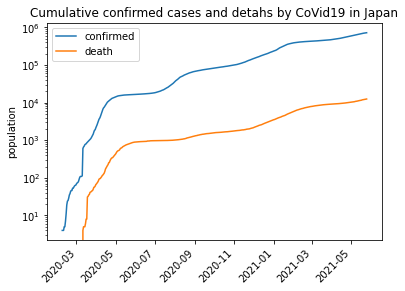

In [11]:
# 全国の陽性数と死亡数を conf および dead に格納
conf = jp_df["陽性数"].groupby("年月日").sum()
dead = jp_df["死亡数"].groupby("年月日").sum()
# 陽性数と死亡数を折れ線グラフでプロット
plt.plot(conf, label="confirmed")
plt.plot(dead, label="death")
# y軸を対数軸にし，軸ラベルを population に
plt.yscale('log')
plt.ylabel('population')
# x軸のラベルを45度回転
plt.xticks(rotation=45, ha="right")
# 凡例を表示
plt.legend()
# タイトルを設定
plt.title('Cumulative confirmed cases and detahs by CoVid19 in Japan')
# グラフを PDFおよび PNG 形式で保存
# bbox_inches='tight' というオプションを設定することで，軸ラベルが見切れてしまうのを防ぐ
plt.savefig('sample.pdf', bbox_inches='tight') # PDF形式で保存
plt.savefig('sample.png', bbox_inches='tight') # PNG形式で保存
# 画面表示 (plt.show()は plt.savefig より後に呼ぶこと． )
plt.show()